<a href="https://colab.research.google.com/github/dawamassidiqi/PCVK/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Nomer 3

<Figure size 1000x1000 with 0 Axes>

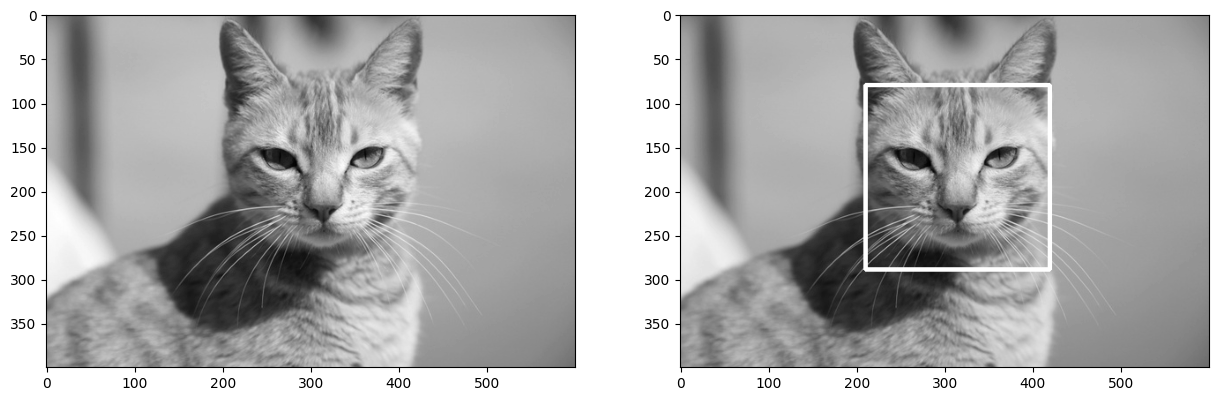

In [10]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images (1)/haarcascades/haarcascade_frontalcatface.xml')

cat_ori = cv.imread('/content/drive/MyDrive/Images (1)/facedet/mycat.jpg',0)
cat_detect = cv.imread('/content/drive/MyDrive/Images (1)/facedet/mycat.jpg',0)

# Inisialisasi detektor wajah
fd_cat = cascade_wajah.detectMultiScale(cat_detect)
# Gambar persegi panjang di sekitar wajah
for (x,y,w,h) in fd_cat: 
  cv.rectangle(cat_detect,(x,y),(x+w,y+h),(255,255,255),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
# Tampilkan hasil deteksi wajah
plt.subplot(121),plt.imshow(cat_ori, cmap='gray')
plt.subplot(122),plt.imshow(cat_detect, cmap='gray')
plt.show()

Nomer 5

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


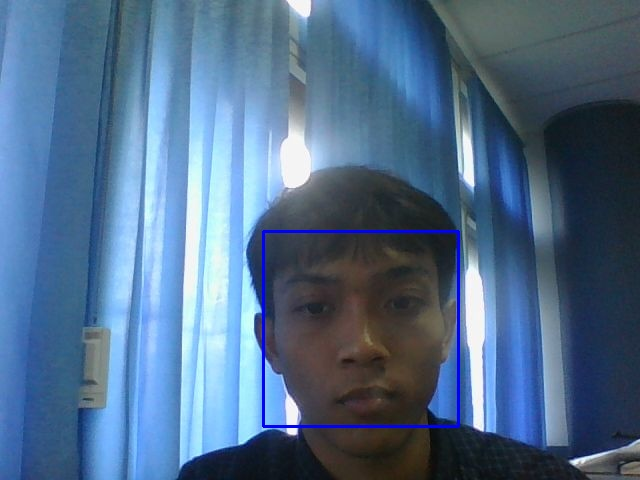

In [13]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import PIL
import html
import time

# Helper Function
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images (1)/haarcascades/haarcascade_frontalface_default.xml')

# Webcam Images
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript(
      '''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = cascade_wajah.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Nomer 6

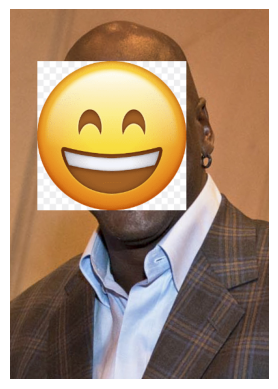

In [14]:
import cv2
import matplotlib.pyplot as plt

# Inisialisasi detektor wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Images (1)/haarcascades/haarcascade_frontalface_alt.xml')

# Baca gambar
mjordan_ori = cv2.imread('/content/drive/MyDrive/Images (1)/facedet/mjordan.jpg')
mjordan_grey = cv2.cvtColor(mjordan_ori, cv2.COLOR_BGR2GRAY)
mjordan_blur = mjordan_grey.copy()

# Deteksi wajah
fd_mjordan = cascade_wajah.detectMultiScale(mjordan_blur)

# Mendapatkan gambar "smile.png"
smile_img = cv2.imread('/content/drive/MyDrive/Images (1)/facedet/smile.png', cv2.IMREAD_UNCHANGED)

# Menindih bagian wajah dengan gambar "smile.png"
for (x, y, w, h) in fd_mjordan:
    # Mengubah ukuran gambar "smile.png" sesuai dengan ukuran wajah
    resized_smile = cv2.resize(smile_img, (w, h))
    # Menindih gambar "smile.png" ke dalam gambar "mjordan_ori"
    mjordan_ori[y:y+h, x:x+w] = resized_smile

# Tampilkan gambar asli dengan bagian wajah ditindih smile
plt.imshow(cv2.cvtColor(mjordan_ori, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()###

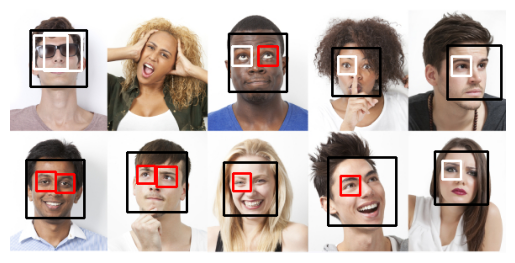

In [15]:
import cv2
from matplotlib import pyplot as plt

# Load the pre-trained face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Images (1)/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Images (1)/haarcascades/haarcascade_eye.xml')

# Load the image
image = cv2.imread('/content/drive/MyDrive/Images (1)/facedet/people.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Draw bounding boxes for detected faces and eyes
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 0), 2)  # Draw black bounding box around face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 2)  # Draw white bounding box around eyes
        
        # Check if the eye is on the right side of the face
        if ex > ew/2:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)  # Draw red bounding box around the right eye

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
